<a href="https://colab.research.google.com/github/Prajakta1828D/Capstone-Project-Play-Store-App-Review-Analysis-Prajakta-Dangale/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction**

---
In this project, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. Analyzing such data could find the answers.






# **Data Collection**


---
There are two datasets:


**1.**apps.csv: contains all the details of the apps on Google Play.

**2.**user_reviews.csv: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.





# **Technology**

---


*   Python (Pandas, Numpy, Plotly, Seaborn and Matplotlib) using Jupyter Notebook




# **Description of App Dataset columns**

---


1. App : The name of the app
2. Category : The category of the app
3. Rating : The rating of the app in the Play Store
4. Reviews : The number of reviews of the app
5. Size : The size of the app
6. Install : The number of installs of the app
7. Type : The type of the app (Free/Paid)
The price of the app (0 if it is Free)
8. Content Rating :The appropiate target audience of the app
9. Genres: The genre of the app
10.Last Updated : The date when the app was last updated
11.Current Ver : The current version of the app
12.Android Ver : The minimum Android version required to run the app





In [ ]:
# Let us begin with importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')
reviews=pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

**info(): It informs about data columns and data types.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**head(): It returns the first five data.**

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**tail(): It returns the last five data.**

In [ ]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**shape : It gives number of rows and columns in a tuble.**

In [ ]:
data.shape

(10841, 13)

**columns : It returns data columns.**

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **Explore The User Review Dataset**

---



In [ ]:
# print the 5 head and 5 row of Play Store dataframe
concat_UserReview = pd.concat([reviews.head(5),reviews.tail(5)])
concat_UserReview

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# print rows and column of play store data
print(f"There are total {reviews.shape[0]} rows and {reviews.shape[1]} columns in playstore dataframe.")

There are total 64295 rows and 5 columns in playstore dataframe.


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
reviews.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


# **Cleaning Data**

---


Our data set contains a large number of null values in the rating column, so we drop them. Some of the columns have a smaller number of null values, so we replace the null values in these columns with the mode value of that particular column. Our data set also contain the duplicate rows for a single application. We also drop the duplicate rows because the rows contain the identical data. Also drop the rows, which have rating greater than 5.
It is observed that some entries in the columns (e.g. Installs and Price) have some non-numeric characters, such as + , and $. Hence, it is necessary to clean our data as this may hinder the future computations.

# Category

**Category-**
 It gives the category to the app.

In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [ ]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can make NaN category value. At that time we can get a clean data. I used shift() method that is found Pandas library.

In [ ]:
data.loc[10472] = data.loc[10472].shift()
data['App'].loc[10472] = data['Category'].loc[10472]
data['Category'].loc[10472] = np.nan
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

# Rating

**Rating-**It contains the average rating the respective app received from its users.

In [ ]:
#Drop records where rating is missing since rating is our target/study variable
pd.isnull(data["Rating"]).sum()

1474

In [ ]:
missing=data[data.isnull().any(axis=1)]

In [ ]:
missing

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


# Android ver

**Android ver-** It tells us about the android version which can support the application on it.

In [ ]:
#Check the null values for the Android Ver column.
data.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# Current ver – replace with most common value
data.mode()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,FAMILY,4.4,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up


In [ ]:
data['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In [ ]:
data['Current Ver'].replace(to_replace="Varies with device", value = 1.0)

0        1.0.0
1        2.0.0
2        1.2.4
3          1.0
4          1.1
         ...  
10836     1.48
10837      1.0
10838      1.0
10839      1.0
10840      1.0
Name: Current Ver, Length: 10841, dtype: object

# Price

**Price -** It gives the price payable to install the app. For free type apps, the price is zero

In [ ]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
data.loc[data["Price"]=="Everyone"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Price variable – remove $ sign and convert to float
data["Price"]=data["Price"].apply(lambda x : float(x.replace("$","")))

In [ ]:
data["Price"].dtypes

dtype('float64')

# Installs

**Installs-** It tells us about the total number of installs/downloads for an application.

In [ ]:
# Installs – remove ‘,’ and ‘+’ sign, convert to integer
data['Installs']=data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
# Which all variables need to be brought to numeric types?
data.dtypes

App                object
Category           object
Rating             object
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Reviews

**Reviews -** It tells us about the total number of users who have given a review for the application.

In [ ]:
data["Reviews"]=data["Reviews"].apply(lambda x : float(x))

In [ ]:
data.dtypes

App                object
Category           object
Rating             object
Reviews           float64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# Reviews should not be more than installs as only those who installed can review the app.
data.loc[data["Reviews"] > data["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4.0,64M,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2.0,238k,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2.0,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11.0,2.0M,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14.0,47M,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


# Rating

**Rating -** It contains the average rating the respective app received from its users.

In [ ]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [ ]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

In [ ]:
# Avg. rating should be between 1 and 5, as only these values are allowed on the play store
(data.loc[data.Rating > 5])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# **Exploratory Data Analysis**

---
Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.




**corr() : It returns correlation.**

In [ ]:
data.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068147,0.051393,-0.021851
Reviews,0.068147,1.000000,0.643123,-0.009666
Installs,0.051393,0.643123,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.011688,1.000000


**describe (): It returns number of entries, average of entries, outlier values, standart deviation, minimum and maximum entry.**

In [ ]:
data.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084100e+04,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,1.546291e+07,1.027273
std,0.515735,2.927629e+06,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


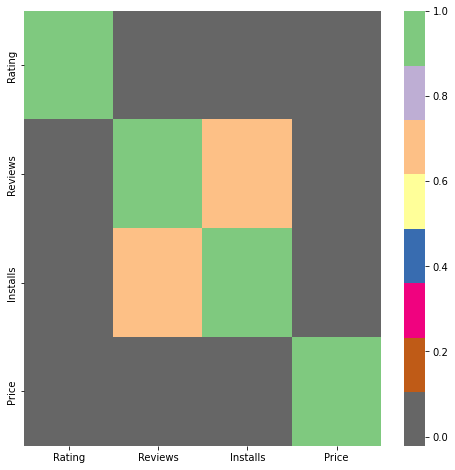

In [ ]:
#correlation map
plt.figure(figsize=(8,8))
corr= data.corr()
sns.heatmap(corr,cmap='Accent_r')
plt.show()

# **1.Rating**



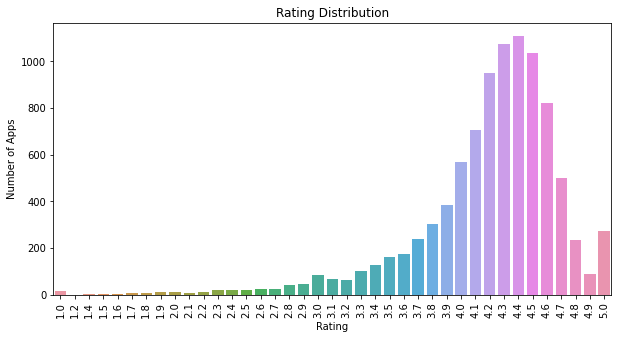

In [ ]:
# 1. show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=data)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

**Insights-**

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

# **2.Application Type**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


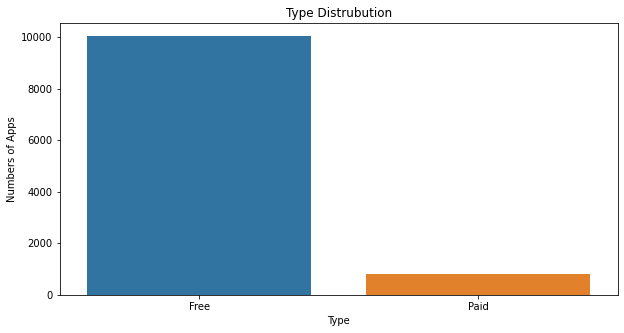

In [ ]:
# 2.Show the majority of App
plt.figure(figsize=(10,5))
sns.countplot(data['Type'])
plt.title('Type Distrubution')
plt.ylabel('Numbers of Apps')
plt.show()

**Insights-**

From the plot we can imply that majority of the apps in the Play Store are Free apps.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


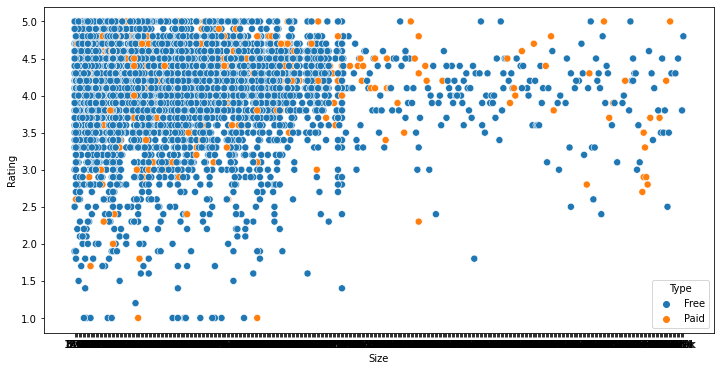

In [ ]:
# 3.show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(data['Size'],
               data['Rating'],
               hue=data['Type'],
               s=50)

**Insights-**

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.



# **3.Category**

---



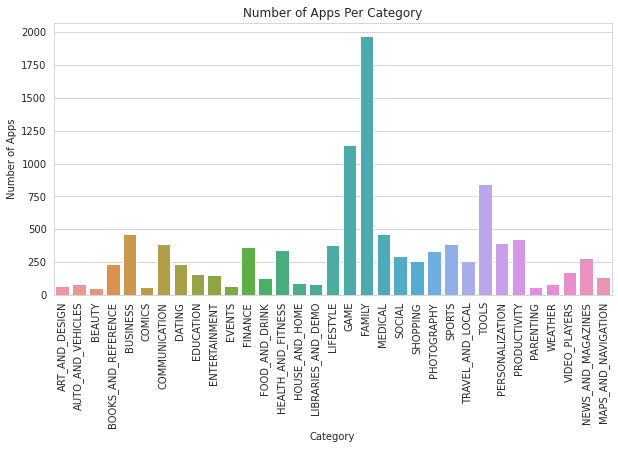

In [ ]:
# 4.get the number of apps for each category
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=data)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


**Insights-**

From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.


# **4.Content Rating**

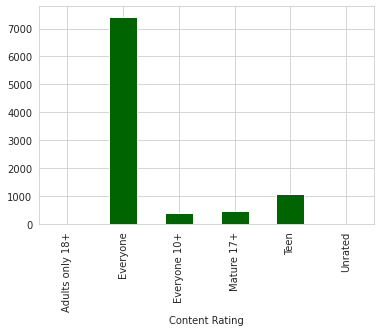

In [ ]:
# 7.Make a bar plot displaying the rating for each content rating
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

**Insights-**



*  Mostly app can use every age group person.
*   Adults only 18+ and unrated have very less number of apps.






# **5.What is the top 5 expensive apps?**

In [ ]:
 #  What is the top 5 expensive apps?
df = data.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7M,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41M,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up


In [ ]:
print(f'The top 5 most expensive apps in the store are: {", ".join(df["App"].head(5))}')

The top 5 most expensive apps in the store are: I'm Rich - Trump Edition, I am rich (Most expensive app), I AM RICH PRO PLUS, I am Rich Plus, most expensive app (H)


# **6. What is the top 5 reviewed apps?**


In [ ]:
#  What is the top 5 reviewed apps?
df = data.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
4473,Instagram,SOCIAL,4.5,266241989.0
7754,WhatsApp Messenger,COMMUNICATION,4.4,207348304.0
5152,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,169932272.0
6885,Subway Surfers,GAME,4.5,166331958.0
3467,Facebook,SOCIAL,4.1,156286514.0


In [ ]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: Instagram, WhatsApp Messenger, Messenger – Text and Video Chat for Free, Subway Surfers, Facebook


# **7.What is the top 5 apps on the basis of installs?**

In [ ]:
# What is the top 5 apps on the basis of installs?
df = data.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703.0,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208.0,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211.0,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211.0,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


In [ ]:
print(f'The 5 apps that have the most number of installs are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of installs are: Subway Surfers, Facebook, Messenger – Text and Video Chat for Free, Google Drive, Google Drive


In [ ]:
top10PaidApps = data[data['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

# **8.Which are the top 10 expensive Apps in playstore?**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_te

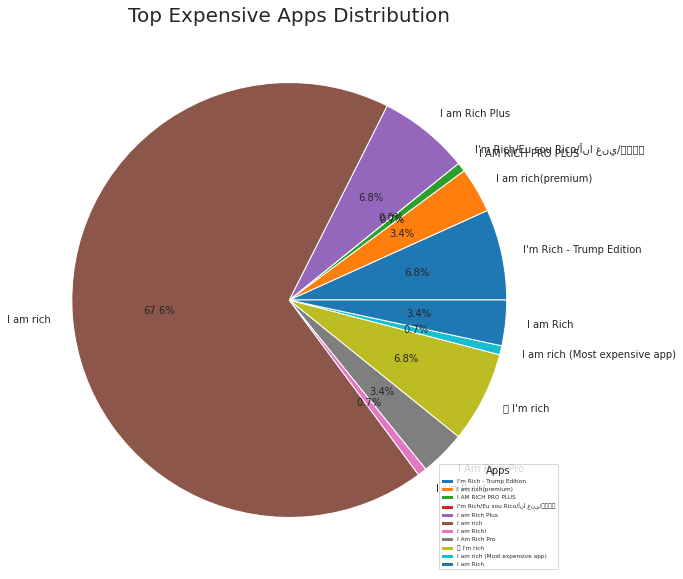

In [ ]:
plt.figure(figsize=(15,10));
plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

**Insights-**

From the above graph we can interprete that the I am Rich app is the most expensive app in the play_store. But this seems to be like a junk app. We need to further analyze if it is a junk app or not by deploying machine learning models in it.

# **9.What are the Top 10 installed apps in any category?**

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = data[data['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

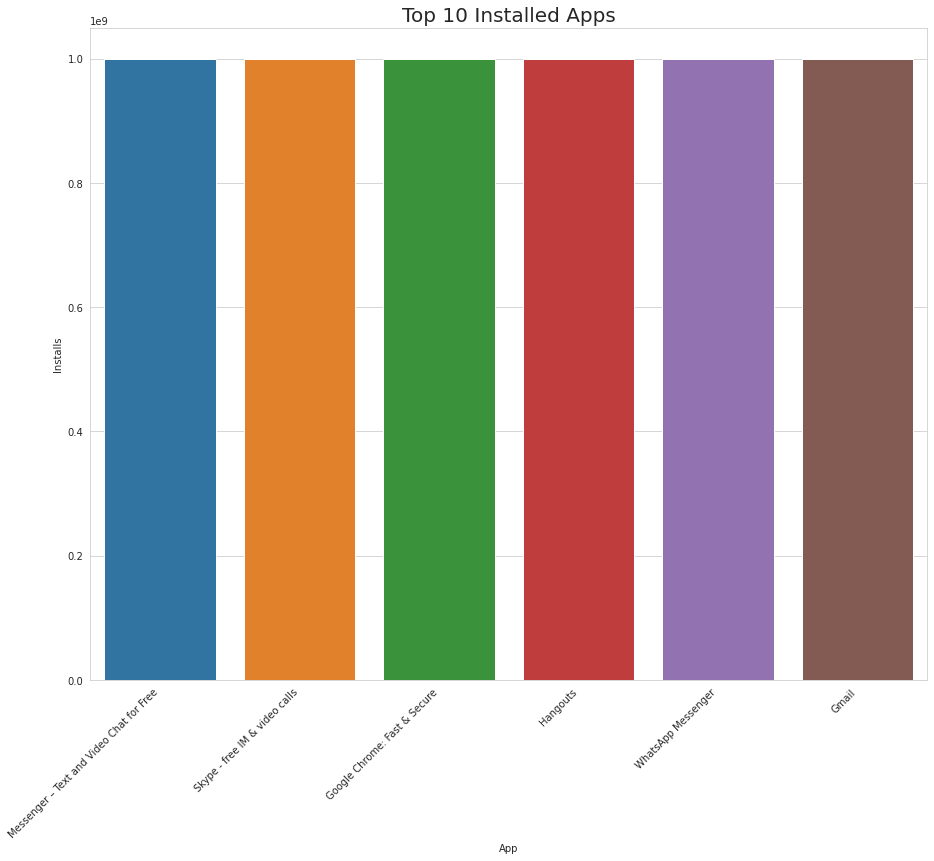

In [ ]:
findtop10incategory('Communication')

**Insights-**


From the above graph we can see that in the Communication category Messenger- Text and Video Chat for Free, WhatsApp Messenger,Gmail has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

# **Conclusion**

---
The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. 


*   From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.


*  From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.
   

*  From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.
*   
Mostly app can use every age group person and Adults only 18+ and unrated have very less number of apps.


* From the above graph we can interprete that the I am Rich app is the most expensive app in the play_store. But this seems to be like a junk app. We need to further analyze if it is a junk app or not by deploying machine learning models in it.
*  From the above graph we can see that in the Communication category Messenger- Text and Video Chat for Free, WhatsApp Messenger,Gmail has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.








**Summary**

First of all I saw the data of play store data anylysis review project first in it I saw two csv files one which is app_csv file  contains all the details of the apps on Google Play. And second file is ser_reviews.csv: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.
Later I studied the app csv file and I saw too many columns like app,category,content rating etc.I have found so many contains a large number of null values in the rating column, so we drop them. Some of the columns have a smaller number of null values, so we replace the null values in these columns with the mode value of that particular column. Our data set also contain the duplicate rows for a single application. We also drop the duplicate rows because the rows contain the identical data. After the cleaning data i turned to Exploratory Data Analysis . I found that majority of the apps in the Play Store are Free apps also top five reviewd apps,top five expensive app. I studied which app mostly installed .Which app are free or paid.I  found that  majority of the free apps are small in size and having high rating.

